<a href="https://colab.research.google.com/github/CM-007/pythonCode_DS/blob/main/2_NLP_NER_and_Word_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.


In [2]:
!python -m spacy download en_core_web_sm # en_core_web_sm is a small English pipeline trained on written web text (blogs, news, comments), that includes vocabulary, syntax and entities.

2023-10-23 05:11:40.145929: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 05:11:41.199622: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.6.0
    Uninstalling en-core-web-sm-3.6.0:
      Successfully uninstalled en-core-web-sm-3.6.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import spacy # contains model which we are going to use
from spacy import displacy # to display along with tag -->this is better version
import pandas as pd

In [4]:
df = pd.read_csv('apple.txt',error_bad_lines=False) # to load txt file with read_csv() keep error_bad_lines=Flase


<ipython-input-4-c99573e8ea78>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('apple.txt',error_bad_lines=False) # to load txt file with read_csv() keep error_bad_lines=Flase
Skipping line 6: expected 1 fields, saw 14



In [5]:
df

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,""""
5,I am very upset about the product as I checked...
6,Reason for 1 star is I ot an defective piece. ...
7,Got the Apple Macbook air on amazon discount s...
8,White line coming on screen in just three mont...
9,"Bought this product recently on 5 April, was w..."


In [7]:
#  how to convert these sentences to paragraph for a corpus?

df['x']# x is a column name


0     It's amazing..... battery last around 10 -12 h...
1     Finally a MacBook possession. Got it in 50k in...
2     Best Laptop under 60k. If you don't want any a...
3     Pros:1. Light weight and super fast response t...
4                                                     "
5     I am very upset about the product as I checked...
6     Reason for 1 star is I ot an defective piece. ...
7     Got the Apple Macbook air on amazon discount s...
8     White line coming on screen in just three mont...
9     Bought this product recently on 5 April, was w...
10    Hi, Think thousand time before buying. One cal...
11    We buy macbook's expecting that it will lasts ...
12    I use this for music production and it works a...
13    Never purchase any Apple products. I bought 3 ...
14    Good purchase of mineBest for programming...On...
15    I bought MacBook air in 2017, it was working f...
16    Bought it on 9th July, stopped working / not t...
17    I bought it last year from Amazon during S

In [ ]:
# we want to join all these sentences.

In [8]:
# instance
nlp = spacy.load('en_core_web_sm') #model name is en_core_web_sm, nlp will now have entire NER model

In [9]:
nlp.pipe_names # shows which different models are present inside en_core_web_sm model

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

simple example

In [10]:
# we want ner (name entity recognition)

doc = nlp('Mr.Elon is going to acquire Twitter Inc of $45 billion in 2023')


In [11]:
doc.ents # ents - will display all entities

(Elon, Twitter Inc, $45 billion, 2023)

In [12]:
for i in doc.ents:
  print(i, '|', i.label_)

Elon | PERSON
Twitter Inc | ORG
$45 billion | MONEY
2023 | DATE


In [13]:
doc1 = nlp('Elon is going to acquire Twitter Inc of $45 billion in 2023')

In [15]:
for i in doc1.ents:
  print(i, '|', i.label_)

Twitter Inc | ORG
$45 billion | MONEY
2023 | DATE


Spacy library is not 100 % precise

In [16]:
# to display graphical representation for tags
displacy.render(doc,style='ent',jupyter=True) # ent - entity, In Jupyter instead of serve() try render()


In [17]:
# to display graphical representation for tags
displacy.render(doc1,style='ent',jupyter=True) # ent - entity, In Jupyter instead of serve() try render()


In [18]:
# joining all sentences of dataset
txt = ' '.join(df['x']) # with space join all sentences in x
txt

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n             Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you mast

In [20]:
x = nlp(txt)
x

It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders
             Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master i

In [22]:
displacy.render(x,style='ent',jupyter=True)

In [23]:
for i in x:
  print(i,i.pos_) # pos - Parts of speech

It PRON
's AUX
amazing ADJ
..... PUNCT
battery NOUN
last ADJ
around ADP
10 NUM
-12 NOUN
hrs NUM
..... PUNCT
best ADJ
laptop NOUN
for ADP
students NOUN
and CCONJ
coders NOUN

              SPACE
Finally ADV
a DET
MacBook PROPN
possession NOUN
. PUNCT
Got VERB
it PRON
in ADP
50k NOUN
in ADP
Diwali ADJ
sale NOUN
. PUNCT
Technically ADV
good ADJ
laptop NOUN
. PUNCT
Good ADJ
News.luxury NOUN
product NOUN
, PUNCT
niche NOUN
technology NOUN
, PUNCT
good ADJ
battery NOUN
life NOUN
, PUNCT
reliable ADJ
machine NOUN
( PUNCT
other ADJ
laptops NOUN
crash NOUN
and CCONJ
become VERB
defunct ADJ
in ADP
6 NUM
- SYM
10 NUM
years NOUN
) PUNCT
, PUNCT
no DET
anti ADJ
- NOUN
virus NOUN
required VERB
, PUNCT
security NOUN
of ADP
data NOUN
and CCONJ
transactions NOUN
much ADV
better ADV
. PUNCT
Terrific ADJ
sense NOUN
of ADP
possession NOUN
& CCONJ
pride NOUN
. PUNCT
Bad PROPN
News PROPN
. PUNCT
Problems NOUN
will AUX
be AUX
there ADV
if SCONJ
you PRON
are AUX
switching VERB
from ADP
windows NOUN
based VERB

In [25]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [26]:
stop = STOPWORDS

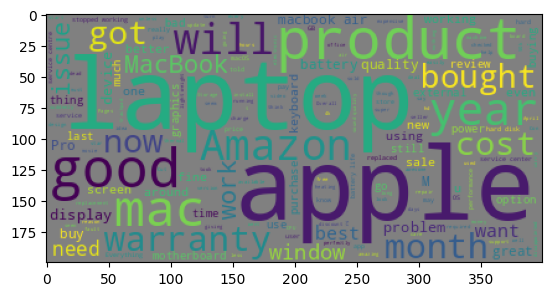

In [27]:
wc = WordCloud(background_color='grey',stopwords=stop).generate(txt)
plt.imshow(wc)